In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-anomaly-detection-dataset-smap-msl/labeled_anomalies.csv
/kaggle/input/nasa-anomaly-detection-dataset-smap-msl/data/data/2018-05-19_15.00.10/params.log
/kaggle/input/nasa-anomaly-detection-dataset-smap-msl/data/data/2018-05-19_15.00.10/smoothed_errors/M-4.npy
/kaggle/input/nasa-anomaly-detection-dataset-smap-msl/data/data/2018-05-19_15.00.10/smoothed_errors/G-6.npy
/kaggle/input/nasa-anomaly-detection-dataset-smap-msl/data/data/2018-05-19_15.00.10/smoothed_errors/S-1.npy
/kaggle/input/nasa-anomaly-detection-dataset-smap-msl/data/data/2018-05-19_15.00.10/smoothed_errors/D-3.npy
/kaggle/input/nasa-anomaly-detection-dataset-smap-msl/data/data/2018-05-19_15.00.10/smoothed_errors/G-3.npy
/kaggle/input/nasa-anomaly-detection-dataset-smap-msl/data/data/2018-05-19_15.00.10/smoothed_errors/P-2.npy
/kaggle/input/nasa-anomaly-detection-dataset-smap-msl/data/data/2018-05-19_15.00.10/smoothed_errors/E-5.npy
/kaggle/input/nasa-anomaly-detection-dataset-smap-msl/data/data/2018-05-1

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/nasa-anomaly-detection-dataset-smap-msl/labeled_anomalies.csv')
df.head()

,chan_id,spacecraft,anomaly_sequences,class,num_values
0,P-1,SMAP,"[[2149, 2349], [4536, 4844], [3539, 3779]]","[contextual, contextual, contextual]",8505
1,S-1,SMAP,"[[5300, 5747]]",[point],7331
2,E-1,SMAP,"[[5000, 5030], [5610, 6086]]","[contextual, contextual]",8516
3,E-2,SMAP,"[[5598, 6995]]",[point],8532
4,E-3,SMAP,"[[5094, 8306]]",[point],8307


In [4]:
df.columns

Index(['chan_id', 'spacecraft', 'anomaly_sequences', 'class', 'num_values'], dtype='object')

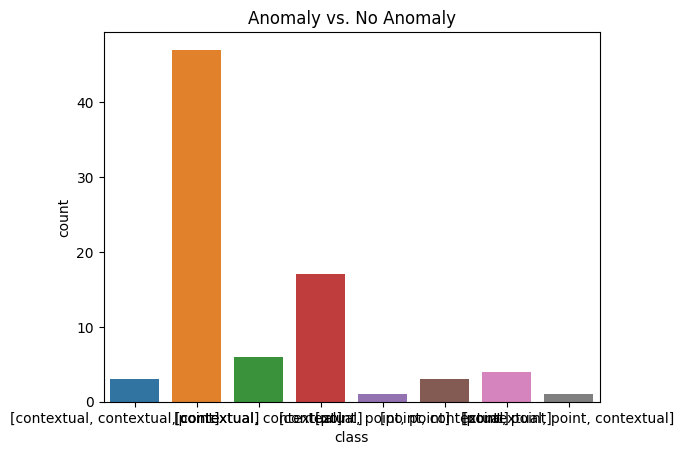

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
sns.countplot(data=df, x='class')
plt.title("Anomaly vs. No Anomaly")
plt.show()

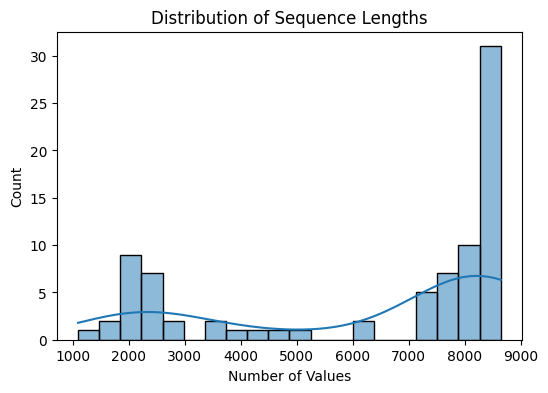

In [6]:
# Number of values in each anomaly sequence
plt.figure(figsize=(6, 4))
sns.histplot(df['num_values'], bins=20, kde=True)
plt.title("Distribution of Sequence Lengths")
plt.xlabel("Number of Values")
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode 'chan_id', 'spacecraft', and 'anomaly_sequences'
le = LabelEncoder()
df['chan_id'] = le.fit_transform(df['chan_id'])
df['spacecraft'] = le.fit_transform(df['spacecraft'])
df['anomaly_sequences'] = le.fit_transform(df['anomaly_sequences'])

In [8]:
# Define X and y
X = df.drop('class', axis=1)
y = df['class'].apply(lambda x: 1 if x == 'anomaly' else 0)  # 1=Anomaly, 0=Normal

In [9]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Train Isolation Forest
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X)

IsolationForest(contamination=0.1, random_state=42)

In [10]:
# Predict: 1=normal, -1=anomaly → convert to 0/1
y_pred = model.predict(X)
y_pred = [0 if x == 1 else 1 for x in y_pred]  # Match original label format

In [11]:
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

Confusion Matrix:
 [[73  9]
 [ 0  0]]


In [12]:
print("\nClassification Report:\n", classification_report(y, y_pred, target_names=["Normal", "Anomaly"]))


Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      0.89      0.94        82
     Anomaly       0.00      0.00      0.00         0

    accuracy                           0.89        82
   macro avg       0.50      0.45      0.47        82
weighted avg       1.00      0.89      0.94        82

